#### Iteratables

An iterable is any object that can return its members one at a time. 
By definition, iterables support the iterator protocol, which specifies how object members are returned when an object is used in an iterator. 

Sequences are iterables.  List, sets, tuples are sequences and iterables.
A dict is not a sequence but is iterable on its keys, values and items


If you want to keep track of the index of an item in a list as well as the value on an iteration you can create a variable to store the index and update it on each iteration:

In [ ]:
values = ["a", "b", "c"]

index = 0

for value in values:
    print(index, value)
    index += 1

The enumerate()function gives you back two loop variables:

The count of the current iteration and 
the value of the item at the current iteration

In [ ]:
for count, value in enumerate(values):
    print(count, value)

In [1]:
my_list = ['apple', 'banana', 'grapes', 'pear']
for c, value in enumerate(my_list, 1):
    print(c, value)


1 apple
2 banana
3 grapes
4 pear


### Working with Files and Text in Python

We will move on to working primarily with Pandas, but it is useful to know basic file operations 


#### Parsing Text
Know how to open and read lines (characters) from  a file.

know some string manipulation methods

* how to read a string, 
* search for values in a string, 
* split up a string based on some delimiting value(s) 
* extract particular segments of a string.
* use data structures to support string and file manipultations 

### General Strategy

* Open the file.
* Read a header line if it exists
* Read the rest of the lines.
* Do something to the line contents
* Write extracted contents to data structures, or to output files

### Opening a file
Use the built-in open() method.

The open method can take up to three parameters: a filename, a mode, and a buffering parameter.

Only the filename, is required.

Using the open() method creates a file object.


In [16]:
popdata = open(r"C:\Courses\DSE Practicum\Data\MECovid.txt", "r")
type(popdata)

_io.TextIOWrapper

#### modes
* 'r' when the file will only be read 
* 'w' for only writing (an existing file with the same name will be erased)
* 'a' opens the file for appending; any data written to the file is automatically added to the end. 


In [11]:
popdata.mode

'r'

In [17]:
popdata.name

'C:\\Courses\\DSE Practicum\\Data\\MECovid.txt'

### Reading from a file

You read from a file with the read method

file.read(size)

reads some quantity of data (given by size) and returns it as a string

When size is omitted or negative, the entire contents of the file will be read and returned – best to avoid this for a large file



### Read a single line
The file class also has a method for reading a single line.

file.readline()

    line = popdata.readline()

A text file is typically structured as a sequence of lines and a line is a sequence of characters.

A line is terminated by a EOL (End Of Line) character.

The most common line terminator is the \n , or the newline character.

For a file with a header you can use readline to get the header information

\t indicates a tab delimiter

In [18]:
header1 = popdata.readline() 
header1

'No\tCounty\tPopulation\tDATA_AS_OF_DT\tcases\tdeaths\thospitalizations\n'

In [19]:
line1 = popdata.readline()
line1

'1\tCumberland\t292307\t1/27/2021\t10993\t151\t368\n'

To read in multilpe lines, typically use a for loop

A file is an iterator type so you can extract each line with a for loop

    for line in file: 

      print line 


#### Closing a file

You should always close a file with the close method.
e.g. gpsdata.close()

#### Using the with pattern

The “with” pattern opens a file and automatically closes it. The with statement provides a way to ensure that a clean-up is always used.

    with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as file:
         for line in file:
           print(line)


In [31]:
with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as file:
    #header1 = file.readline() 
    for line in file:
            print (line)

1	Cumberland	292307	1/27/2021	10993	151	368

2	York	204316	1/27/2021	8259	97	280

3	Penobscot	151774	1/27/2021	3332	58	164

4	Kennebec	121753	1/27/2021	3022	42	106

5	Androscoggin	107602	1/27/2021	4208	52	139

6	Aroostook	67809	1/27/2021	1115	35	56

7	Oxford	57550	1/27/2021	1863	34	53

8	Hancock	54601	1/27/2021	766	30	37

9	Somerset	50520	1/27/2021	1066	25	51

10	Knox	39759	1/27/2021	572	4	18

11	Waldo	39539	1/27/2021	505	18	23

12	Sagadahoc	35452	1/27/2021	753	1	16

13	Lincoln	34201	1/27/2021	462	2	15

14	Washington	31491	1/27/2021	603	9	22

15	Franklin	29982	1/27/2021	740	8	16

16	Piscataquis	16836	1/27/2021	194	1	11



### String Operations

Once you have a line from a file you typically want to extract information from the file, or do some reformatting. 

### Split method

split([sep [,maxsplit]])

Return a list of the words in the string, using sep as the delimiter string

Default separator is white space

If maxsplit is given, at most maxsplit splits are done

   with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as file:
     for line in file:
            linesegment =line.split()
            print (linesegment)
            

In [30]:
 with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as file:
        for line in file:
            linesegment =line.split("\t")
            print (linesegment)
            

['No', 'County', 'Population', 'DATA_AS_OF_DT', 'cases', 'deaths', 'hospitalizations\n']
['1', 'Cumberland', '292307', '1/27/2021', '10993', '151', '368\n']
['2', 'York', '204316', '1/27/2021', '8259', '97', '280\n']
['3', 'Penobscot', '151774', '1/27/2021', '3332', '58', '164\n']
['4', 'Kennebec', '121753', '1/27/2021', '3022', '42', '106\n']
['5', 'Androscoggin', '107602', '1/27/2021', '4208', '52', '139\n']
['6', 'Aroostook', '67809', '1/27/2021', '1115', '35', '56\n']
['7', 'Oxford', '57550', '1/27/2021', '1863', '34', '53\n']
['8', 'Hancock', '54601', '1/27/2021', '766', '30', '37\n']
['9', 'Somerset', '50520', '1/27/2021', '1066', '25', '51\n']
['10', 'Knox', '39759', '1/27/2021', '572', '4', '18\n']
['11', 'Waldo', '39539', '1/27/2021', '505', '18', '23\n']
['12', 'Sagadahoc', '35452', '1/27/2021', '753', '1', '16\n']
['13', 'Lincoln', '34201', '1/27/2021', '462', '2', '15\n']
['14', 'Washington', '31491', '1/27/2021', '603', '9', '22\n']
['15', 'Franklin', '29982', '1/27/2021',

### String find

Returns the lowest index in the string where substring sub is found, such that sub is contained in the slice s[start:end]. 

str.find(sub[, start[, end]])


Returns -1 if sub is not found. 


In [3]:
 with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as file:
        header=file.readline()
        for line in file:
            index =line.find("Oxford")
            print (line, index)
        

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Courses\\DSE Practicum\\Data\\MECovid.txt'

### String index

str.index(sub[, start[, end]])

Like find(), but raises ValueError when the substring is not found


In [36]:
 with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as file:
        header=file.readline()
        for line in file:
            indx =line.index("1/27/2021")
            print (line, indx)
             

1	Cumberland	292307	1/27/2021	10993	151	368
 20
2	York	204316	1/27/2021	8259	97	280
 14
3	Penobscot	151774	1/27/2021	3332	58	164
 19
4	Kennebec	121753	1/27/2021	3022	42	106
 18
5	Androscoggin	107602	1/27/2021	4208	52	139
 22
6	Aroostook	67809	1/27/2021	1115	35	56
 18
7	Oxford	57550	1/27/2021	1863	34	53
 15
8	Hancock	54601	1/27/2021	766	30	37
 16
9	Somerset	50520	1/27/2021	1066	25	51
 17
10	Knox	39759	1/27/2021	572	4	18
 14
11	Waldo	39539	1/27/2021	505	18	23
 15
12	Sagadahoc	35452	1/27/2021	753	1	16
 19
13	Lincoln	34201	1/27/2021	462	2	15
 17
14	Washington	31491	1/27/2021	603	9	22
 20
15	Franklin	29982	1/27/2021	740	8	16
 18
16	Piscataquis	16836	1/27/2021	194	1	11
 21


### String strip

**str.lstrip([chars])**

Returns a copy of the string with leading characters removed.

The chars argument is a string specifying the set of characters to be removed.

If omitted or None, the chars argument defaults to removing whitespace

**str.rstrip([chars])**

Returns a copy of the string with trailing characters removed.


In [61]:
with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as file:
        header=file.readline()
        for line in file:
            linesegment =line.split()
            print(linesegment[1])
            name=linesegment[1].strip('A')
            print(name)
            
        

Cumberland
Cumberland
York
York
Penobscot
Penobscot
Kennebec
Kennebec
Androscoggin
ndroscoggin
Aroostook
roostook
Oxford
Oxford
Hancock
Hancock
Somerset
Somerset
Knox
Knox
Waldo
Waldo
Sagadahoc
Sagadahoc
Lincoln
Lincoln
Washington
Washington
Franklin
Franklin
Piscataquis
Piscataquis


### Using csv reader

csv is a module for working with files. 

The csv module implements classes to read and write tabular data in CSV format.

The csv module has reader and writer objects for reading and writing sequences.

One can also read and write data in dictionary form using the DictReader and DictWriter classes.

csv.reader return a reader object which will iterate over lines in the given csvfile. csvfile can be any object which supports the iterator protocol and returns a string each time its __next__() method is called.

Each row read from the csv file is returned as a list of strings.

csv.reader(csvfile, dialect='excel', **optional_parameters)

In [5]:
import csv

In [3]:
with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as co:
    co_reader = csv.reader(co, delimiter='\t')
    h=next(co_reader)
    print (h)
    for line in co_reader:
        print (line)

['No', 'County', 'Population', 'DATA_AS_OF_DT', 'cases', 'deaths', 'hospitalizations']
['1', 'Cumberland', '292307', '1/27/2021', '10993', '151', '368']
['2', 'York', '204316', '1/27/2021', '8259', '97', '280']
['3', 'Penobscot', '151774', '1/27/2021', '3332', '58', '164']
['4', 'Kennebec', '121753', '1/27/2021', '3022', '42', '106']
['5', 'Androscoggin', '107602', '1/27/2021', '4208', '52', '139']
['6', 'Aroostook', '67809', '1/27/2021', '1115', '35', '56']
['7', 'Oxford', '57550', '1/27/2021', '1863', '34', '53']
['8', 'Hancock', '54601', '1/27/2021', '766', '30', '37']
['9', 'Somerset', '50520', '1/27/2021', '1066', '25', '51']
['10', 'Knox', '39759', '1/27/2021', '572', '4', '18']
['11', 'Waldo', '39539', '1/27/2021', '505', '18', '23']
['12', 'Sagadahoc', '35452', '1/27/2021', '753', '1', '16']
['13', 'Lincoln', '34201', '1/27/2021', '462', '2', '15']
['14', 'Washington', '31491', '1/27/2021', '603', '9', '22']
['15', 'Franklin', '29982', '1/27/2021', '740', '8', '16']
['16', 'Pis

Lets say we want to create a dictionary of County and Covid cases. 

We might first want ot get the index of the fields of interest

In [6]:
countypopdict={}
with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as co:
    co_reader = csv.reader(co, delimiter='\t')
    header=next(co_reader) # read the file header
    print(header.index('cases')) # get the index for cases
    
        

4


In [1]:
keys = countydict.keys()
keys

NameError: name 'countydict' is not defined

In [ ]:
values = countydict.values()
values

How to reverse dictionary

In [22]:
res = dict(reversed(list(countydict.items())))
res

{'Piscataquis': 194,
 'Franklin': 740,
 'Washington': 603,
 'Lincoln': 462,
 'Sagadahoc': 753,
 'Waldo': 505,
 'Knox': 572,
 'Somerset': 1066,
 'Hancock': 766,
 'Oxford': 1863,
 'Aroostook': 1115,
 'Androscoggin': 4208,
 'Kennebec': 3022,
 'Penobscot': 3332,
 'York': 8259,
 'Cumberland': 10993}

In [23]:
keys = res.keys()
values = res.values()

Now we can plot the data

In [11]:
import matplotlib.pyplot as plt

<BarContainer object of 16 artists>

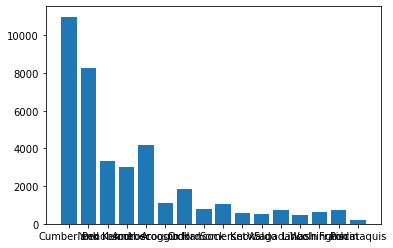

In [13]:
plt.bar(keys, values)

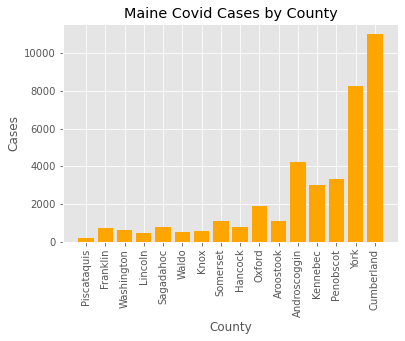

In [25]:
%matplotlib inline
plt.style.use('ggplot')


x_pos = [i for i, _ in enumerate(keys)]

plt.bar(x_pos, values, color='orange')
plt.xlabel("County")
plt.ylabel("Cases")
plt.title("Maine Covid Cases by County")

plt.xticks(x_pos, keys, rotation =90)

plt.show()

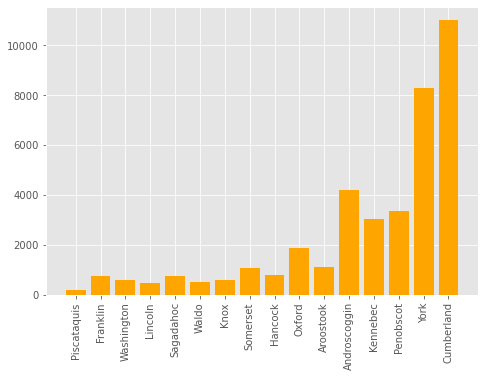

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Counties = list(keys)
Cases = list(values)
ax.bar(Counties,values, color='orange')
x_pos = [i for i, _ in enumerate(keys)]
plt.xticks(x_pos, keys, rotation =90)
plt.show()

In [6]:
countydict={}
with open(r"C:\Courses\DSE Practicum\Data\MECovid.txt") as co:
    co_reader = csv.reader(co, delimiter='\t')
    h=next(co_reader)
    caseindex=(h.index('cases'))
    deathindex=(h.index('deaths'))
    for line in co_reader:
        county=line[1]
        cases=int(line[caseindex])
        deaths=int(line[deathindex])
        countydict[county]=[cases, deaths]

print(countydict)

{'Cumberland': [10993, 151], 'York': [8259, 97], 'Penobscot': [3332, 58], 'Kennebec': [3022, 42], 'Androscoggin': [4208, 52], 'Aroostook': [1115, 35], 'Oxford': [1863, 34], 'Hancock': [766, 30], 'Somerset': [1066, 25], 'Knox': [572, 4], 'Waldo': [505, 18], 'Sagadahoc': [753, 1], 'Lincoln': [462, 2], 'Washington': [603, 9], 'Franklin': [740, 8], 'Piscataquis': [194, 1]}
